In [4]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v0')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

Q = np.zeros((STATES, ACTIONS))

EPISODES = 20000 # how many times to run the enviornment from the beginning
MAX_STEPS = 100  # max number of steps allowed for each run of enviornment

LEARNING_RATE = 0.81  # learning rate
GAMMA = 0.96

RENDER = False # if you want to see training set to true

epsilon = 0.9


In [5]:
rewards = []
for episode in range(EPISODES):

  state = env.reset()
  for _ in range(MAX_STEPS):
    
    if RENDER:
      env.render()

    if np.random.uniform(0, 1) < epsilon:
      action = env.action_space.sample()  
    else:
      action = np.argmax(Q[state, :])

    next_state, reward, done, _ = env.step(action)

    Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])

    state = next_state

    if done: 
      rewards.append(reward)
      epsilon -= 0.001
      break  # reached goal

print(Q)
print(f"Average reward: {sum(rewards)/len(rewards)}:")
# and now we can see our Q values!

[[3.01372759e-01 8.75079947e-03 8.69048516e-03 8.41138268e-03]
 [2.83871437e-03 1.67303276e-03 3.37021633e-03 3.24575868e-01]
 [1.91805198e-03 1.64620100e-03 2.34652706e-03 3.34459826e-01]
 [7.62669106e-04 1.49695840e-03 1.34689043e-04 1.85415091e-01]
 [3.78550215e-01 9.93330301e-04 4.07970894e-03 3.55866931e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.95161797e-04 2.31656314e-07 5.76773649e-07 1.56282857e-07]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.32460864e-03 4.17990530e-03 4.75191629e-03 5.31360405e-01]
 [2.47881502e-03 8.36773926e-01 1.94840526e-03 1.79168980e-03]
 [1.79389656e-01 3.60916980e-05 4.50723217e-05 1.37464346e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.02777678e-02 2.50998280e-02 7.21087132e-01 9.29934521e-04]
 [7.12254531e-02 7.20614655e-01 1.11728779e-01 8.75710208e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

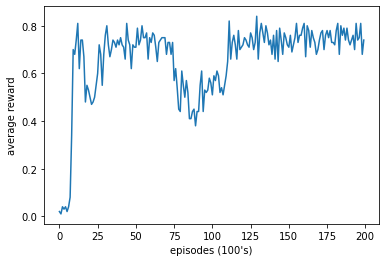

In [6]:
# we can plot the training progress and see how the agent improved
import matplotlib.pyplot as plt

def get_average(values):
  return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
  avg_rewards.append(get_average(rewards[i:i+100])) 

plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show()